In [1]:
%pylab inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import matplotlib.ticker as mticker
from matplotlib.patches import Polygon
import cmocean.cm as cmo
import gsw

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Populating the interactive namespace from numpy and matplotlib


In [2]:
savefig = True
figext = '.pdf'
datadir = '/Users/erik/Desktop/'

degsym = u'\u00B0'

def savefig(fignum, figext=figext, savefig=savefig):
    figname = 'Fig%s%s' % (fignum, figext)
    if savefig:
        plt.savefig(figname)

In [3]:
def plot_argos(Aall, ids_all, projection, extent=None, pottemp=False, ylim=[0, 2000]):
    if not isinstance(Aall, list):
        Aall = [Aall]
                      
    fig = plt.figure(figsize=(10, 4), constrained_layout=True)
    gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 3])

    ax0 = fig.add_subplot(gs[0])
    ax1 = fig.add_subplot(gs[1])
    ax2 = fig.add_subplot(gs[2])
    ax3 = fig.add_subplot(gs[3], projection=projection)

    for A, ids in zip(Aall, ids_all):
        ptemp = gsw.conversions.pt_from_t(A.PSAL_ADJUSTED, A.TEMP_ADJUSTED, A.PRES_ADJUSTED, 0)
        if pottemp:
            temp = ptemp
            ax0.set_title('a) Potential temperature')
        else:
            temp = A.TEMP_ADJUSTED
            ax0.set_title('a) Temperature')
        dens = gsw.density.sigma0(A.PSAL_ADJUSTED, ptemp)

        for ai, var in zip([ax0, ax1, ax2], [temp, A.PSAL_ADJUSTED, dens]):
            for j in ids:
                ai.plot(var[j, :], A.PRES_ADJUSTED[j, :], linewidth=2)

        ax3.plot(A.LONGITUDE, A.LATITUDE, 'k*', transform=cartopy.crs.PlateCarree())
        for j in ids:
            ax3.plot(A.LONGITUDE[j], A.LATITUDE[j], '*', transform=cartopy.crs.PlateCarree(),
                      markersize=15)

    for ai in [ax0, ax1, ax2]:
        ai.set_ylim(ylim)
        ai.invert_yaxis()
    ax0.set_ylabel('Pressure [dbar]')
    ax0.set_xlabel('[%sC]' %degsym)
    ax1.set_xlabel('[psu]')
    ax1.set_title('b) Salinity')
    ax1.set_yticklabels([])
    ax2.set_xlabel('$\sigma_0$ [kg m$^{-3}$]')
    ax2.set_yticklabels([])
    ax2.set_title('c) Density')

    ax3.coastlines(resolution='50m')
    ax3.add_feature(cartopy.feature.LAND)

    gl = ax3.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=False, linewidth=0.5,
                       color='gray', alpha=0.5, linestyle='--')
    if extent:
        ax3.set_extent(extent, crs=cartopy.crs.PlateCarree())

    if isinstance(projection, cartopy.crs.PlateCarree):
        gl.xlabels_bottom = True
        gl.xformatter = LONGITUDE_FORMATTER
        gl.ylabels_left = True
        gl.yformatter = LATITUDE_FORMATTER
    if len(Aall)== 1:
        ax3.set_title('d) Argo profiles on %s' % Aall[0].JULD.dt.strftime('%d %B %Y').values[0])
    else:
        ax3.set_title('d) Argo profiles on %s-%s' % (Aall[0].JULD.dt.strftime('%d').values[0], Aall[-1].JULD.dt.strftime('%d %B %Y').values[0]))
    fig.canvas.draw()
    plt.tight_layout()
    return ax3

[[80, 9]]


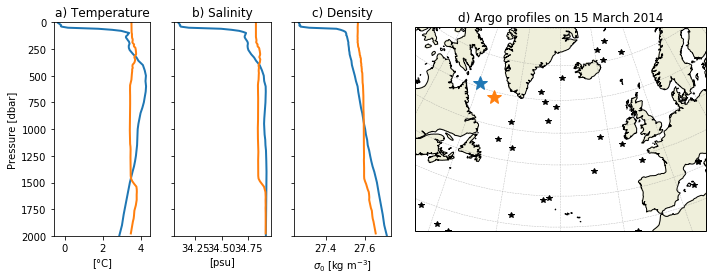

In [4]:
fignum = '07_21'

A = xr.open_dataset(datadir+'ArgoDataArchive/fig7pt21_20140315_prof.nc')

ids = [[np.where((A.LONGITUDE<-59) & (A.LATITUDE>60))[0][0], 
        np.where((A.LONGITUDE<-52) & (A.LATITUDE<60) & (A.LATITUDE>55))[0][0]]]
print(ids)

projection = cartopy.crs.LambertConformal(central_longitude=-30)
plot_argos(A, ids, projection, [-65, 5, 35, 70])
savefig(fignum)

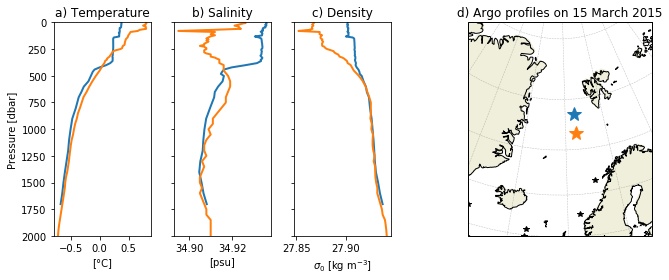

In [5]:
fignum = '07_22'

A = xr.open_dataset(datadir+'ArgoDataArchive/fig7pt22_20150315_prof.nc')

ids = [[np.where((A.LONGITUDE>0) & (A.LATITUDE>76))[0][0], 
        np.where((A.LONGITUDE>0) & (A.LATITUDE<76) & (A.LATITUDE>72))[0][0]]]

projection = cartopy.crs.LambertConformal(central_longitude=-2.5)
plot_argos(A, ids, projection, [-30, 25, 60, 85])
savefig(fignum)

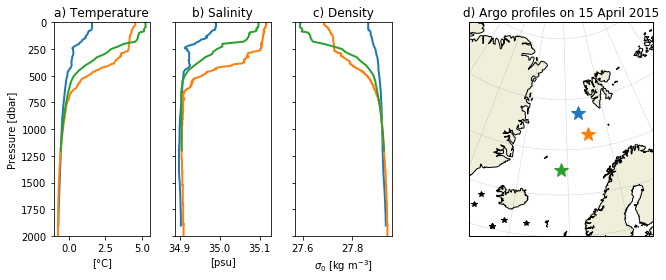

In [6]:
fignum = '07_23'

A = xr.open_dataset(datadir+'ArgoDataArchive/fig7pt23_20150415_prof.nc')

ids = [[np.where((A.LONGITUDE>0) & (A.LATITUDE>76))[0][0], 
        np.where((A.LONGITUDE>0) & (A.LATITUDE>72) & (A.LATITUDE<76))[0][0],
        np.where((A.LONGITUDE<0) & (A.LATITUDE>68) & (A.LATITUDE<74))[0][0]]]

projection = cartopy.crs.LambertConformal(central_longitude=-2.5)
plot_argos(A, ids, projection, [-30, 25, 60, 85])
savefig(fignum)

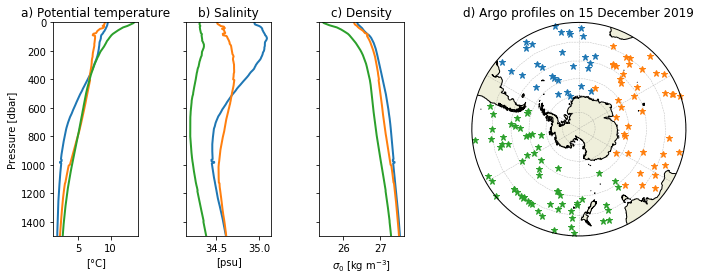

In [7]:
fignum = '08_19'

Aatl = xr.open_dataset(datadir+'ArgoDataArchive/fig8pt19_20191215_prof_atl.nc')
Aind = xr.open_dataset(datadir+'ArgoDataArchive/fig8pt19_20191215_prof_ind.nc')
Apac = xr.open_dataset(datadir+'ArgoDataArchive/fig8pt19_20191215_prof_pac.nc')

projection = cartopy.crs.SouthPolarStereo()
fig = plt.figure(figsize=(10, 4), constrained_layout=True)
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 3])

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])
ax3 = fig.add_subplot(gs[3], projection=projection)

for A in [Aatl, Aind, Apac]:
    pres = np.arange(0, 1500, 5)
    ids = np.where(A.LATITUDE < -30)[0]
    pottemp = np.zeros((len(ids), len(pres)))
    salt = np.zeros((len(ids), len(pres)))
    for i, idx in enumerate(ids):
        salt[i, :] = np.interp(pres, A.PRES_ADJUSTED[idx, :].values, A.PSAL_ADJUSTED[idx, :].values)
        pottemp[i, :] = np.interp(pres, A.PRES_ADJUSTED[idx, :], gsw.conversions.pt_from_t(A.PSAL_ADJUSTED[idx, :], A.TEMP_ADJUSTED[idx, :], A.PRES_ADJUSTED[idx, :], 0))
    dens = gsw.density.sigma0(salt, pottemp)
    
    for ai, var in zip([ax0, ax1, ax2], [pottemp, salt, dens]):
        ai.plot(np.nanmean(var,axis=0), pres, linewidth=2)
    ax3.plot(A.LONGITUDE[ids], A.LATITUDE[ids], '*', transform=cartopy.crs.PlateCarree(),
              markersize=7)

for ai in [ax0, ax1, ax2]:
    ai.set_ylim([0, 1500])
    ai.invert_yaxis()
ax0.set_ylabel('Pressure [dbar]')
ax0.set_xlabel('[%sC]' %degsym)
ax0.set_title('a) Potential temperature')
ax1.set_xlabel('[psu]')
ax1.set_title('b) Salinity')
ax1.set_yticklabels([])
ax2.set_xlabel('$\sigma_0$ [kg m$^{-3}$]')
ax2.set_yticklabels([])
ax2.set_title('c) Density')

ax3.coastlines(resolution='50m')
ax3.add_feature(cartopy.feature.LAND)

gl = ax3.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=False, linewidth=0.5,
                   color='gray', alpha=0.5, linestyle='--')
ax3.set_extent([-180, 180, -90, -30], crs=cartopy.crs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax3.set_boundary(circle, transform=ax3.transAxes)

ax3.set_title('d) Argo profiles on %s' % A.JULD.dt.strftime('%d %B %Y').values[0])
fig.canvas.draw()
plt.tight_layout()

savefig(fignum)

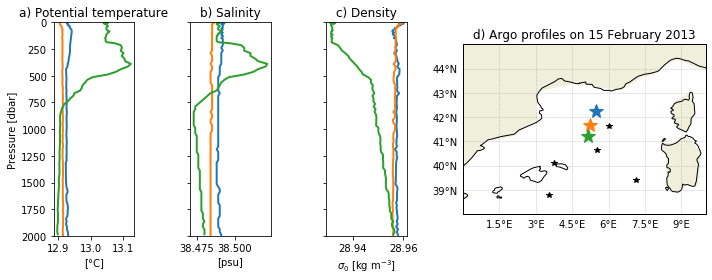

In [8]:
fignum = '09_25'

A = xr.open_dataset(datadir+'ArgoDataArchive/fig9pt25_20130215_prof.nc')

ids = [[np.where((A.LONGITUDE>4) & (A.LONGITUDE<6) & (A.LATITUDE>42) & (A.LATITUDE<44))[0][0],
        np.where((A.LONGITUDE>4) & (A.LONGITUDE<6) & (A.LATITUDE>41.5) & (A.LATITUDE<42))[0][0],
        np.where((A.LONGITUDE>4) & (A.LONGITUDE<6) & (A.LATITUDE>41) & (A.LATITUDE<41.5))[0][0]]]

projection = cartopy.crs.PlateCarree(central_longitude=5)
plot_argos(A, ids, projection, [0, 10, 38, 45], pottemp=True)

savefig(fignum)

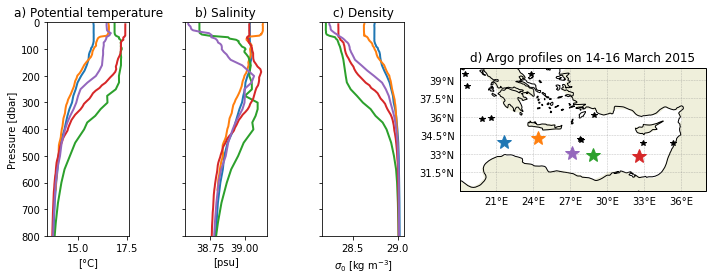

In [9]:
fignum = '09_26'

A = [xr.open_dataset(datadir+'ArgoDataArchive/fig9pt26_20150314_prof.nc'), 
     xr.open_dataset(datadir+'ArgoDataArchive/fig9pt26_20150315_prof.nc'), 
     xr.open_dataset(datadir+'ArgoDataArchive/fig9pt26_20150316_prof.nc')]

ids = [[np.where(np.isclose(A[0].LONGITUDE, 21.586) & np.isclose(A[0].LATITUDE, 33.967))[0][0],
        np.where(np.isclose(A[0].LONGITUDE, 24.38) & np.isclose(A[0].LATITUDE, 34.294))[0][0]],
       [np.where(np.isclose(A[1].LONGITUDE, 28.823) & np.isclose(A[1].LATITUDE, 32.929))[0][0],
        np.where(np.isclose(A[1].LONGITUDE, 32.565) & np.isclose(A[1].LATITUDE, 32.844))[0][0]],
       [np.where(np.isclose(A[2].LONGITUDE, 27.177) & np.isclose(A[2].LATITUDE, 33.075))[0][0]]]

projection = cartopy.crs.PlateCarree(central_longitude=28)
plot_argos(A, ids, projection, [18, 38, 30, 40], pottemp=True, ylim=[0, 800])

savefig(fignum)

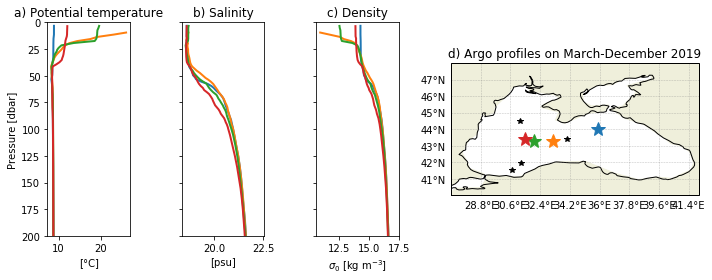

In [10]:
fignum = '09_27'

A = [xr.open_dataset(datadir+'ArgoDataArchive/fig9pt27_20190329_prof.nc'), 
     xr.open_dataset(datadir+'ArgoDataArchive/fig9pt27_20190627_prof.nc'), 
     xr.open_dataset(datadir+'ArgoDataArchive/fig9pt27_20190930_prof.nc'),
     xr.open_dataset(datadir+'ArgoDataArchive/fig9pt27_20191224_prof.nc')]

ids = []
for a in A:
    ids.append(np.where((a.LONGITUDE>30) & (a.LONGITUDE<37) & (a.LATITUDE>42) & (a.LATITUDE<44.1))[0].tolist())
ids[3] = [64]

projection = cartopy.crs.PlateCarree(central_longitude=34.5)
ax3 = plot_argos(A, ids, projection, [27, 42, 40, 48], pottemp=True, ylim=[0, 200])
ax3.set_title('d) Argo profiles on %s-%s' % (A[0].JULD.dt.strftime('%B').values[0], A[-1].JULD.dt.strftime('%B %Y').values[0]))

savefig(fignum)

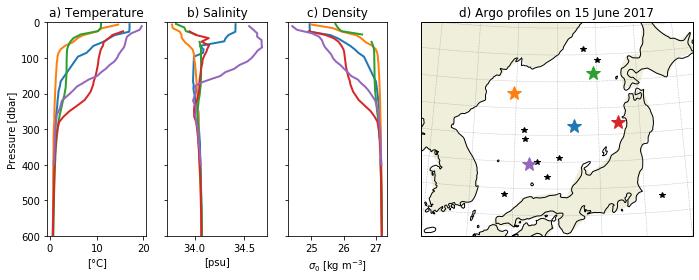

In [11]:
fignum = '09_32'

A = xr.open_dataset(datadir+'ArgoDataArchive/fig9pt32_20170615_prof.nc')

ids = [np.where((A.LONGITUDE>129) & (A.LONGITUDE<141) & (A.LATITUDE>39.3) & (A.LATITUDE<42.5))[0].tolist(),
       [np.where((A.LONGITUDE>132) & (A.LONGITUDE<134) & (A.LATITUDE>37.3) & (A.LATITUDE<37.5))[0][0]]]
ids = [[item for sublist in ids for item in sublist]]

projection = cartopy.crs.LambertConformal(central_longitude=135)
plot_argos(A, ids, projection, [126, 144, 33, 45], ylim=[0, 600])
savefig(fignum)